In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import string
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
color = sns.color_palette()

%matplotlib inline

stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

In [4]:
sub = pd.read_csv("SampleSubmission.csv")
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")

In [5]:

train.shape , test.shape , sub.shape

((1436, 3), (620, 2), (620, 2))

In [8]:
train.head(2)

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS


In [9]:
from collections import Counter
Counter(train['Text'][0])

Counter({' ': 335,
         'M': 20,
         'w': 67,
         'a': 374,
         'n': 189,
         'g': 34,
         'o': 113,
         'd': 112,
         'e': 100,
         ':': 3,
         'K': 7,
         'h': 87,
         's': 55,
         'l': 79,
         'c': 46,
         'i': 237,
         'y': 50,
         'm': 105,
         't': 83,
         'A': 9,
         'k': 104,
         'r': 50,
         ',': 13,
         'b': 33,
         'z': 52,
         'u': 125,
         '.': 20,
         'L': 3,
         'p': 46,
         'f': 6,
         'D': 3,
         'I': 4,
         'E': 2,
         'S': 3,
         'B': 2,
         'N': 13,
         'J': 1,
         'W': 2,
         'C': 6,
         'P': 4,
         'T': 1,
         '2': 2,
         '7': 1,
         'j': 5,
         '\n': 7,
         '?': 6,
         'v': 1,
         'V': 1,
         'R': 1,
         '(': 1,
         ')': 1,
         '1': 1,
         'Z': 2})

In [11]:
new_df = train.copy()

In [12]:
import string
# [x  for x in string.ascii_lowercase]

for x in string.ascii_lowercase:
    new_df[x] = 0

In [27]:
new_df.head()

,ID,text,label,a,b,c,d,e,f,g,...,q,r,s,t,u,v,w,x,y,z
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U0TTYY8,ak slouma,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# for i ,j in Counter(train['text'][0]).items():
#     new_df.loc[0][i] = j


In [40]:
# for i in range(train.shape[]):

In [41]:
train.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1


In [42]:
# # sample_size  = int(train[train['label']== -1].shape[0]*0.8)
# train_2 = train[train['label']== 1].sample(5000, replace = True)
# train_1 = train[train['label']== -1].sample(5000, replace = True)
# train = train[train['label'] ==0]

In [43]:
train.isna().sum()

ID       0
text     0
label    0
dtype: int64

In [44]:
# train = pd.concat([train  , train_2 , train_1]).reset_index(drop=True)


In [45]:
train.isna().sum()

ID       0
text     0
label    0
dtype: int64

In [13]:
# plot dist for labels
cnt_srs = train['label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

KeyError: 'label'

In [47]:
author_mapping_dict = {0:0, 1:1, -1:2}
train_y = train['label'].map(author_mapping_dict)
train['label'] = train['label'].map(author_mapping_dict)

In [48]:
test.shape
y = train.label

In [49]:
train_y.isna().sum()

0

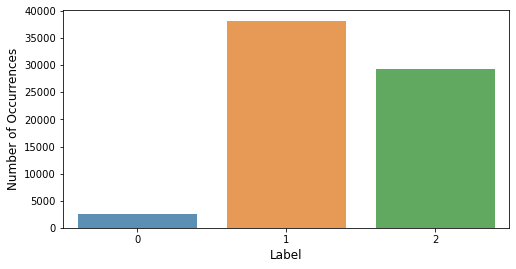

In [50]:
# plot dist for labels
cnt_srs = train['label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

In [51]:
# z =0
# for i in range(20):
#     try:
#         print(train[train['label'] == -1].loc[i]['text'])
#     z = z+1
#     if z ==10:
#         break
#     print('\n\n')

Seems that the dataset is not equally distributed

In [52]:
# lets see review for 5 texts
grouped_df = train.groupby('label')
for label, sent in grouped_df:
    print("Label : ", label)
    cnt = 0
    for ind, row in sent.iterrows():
        print(row["text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Label :  0
nheb nkollek ana mathimni fi tunis ken ca w madhabia timchi 3la rohek milli ritnek ma rana khir
slim slim slim slim
salim ben hamidane
eli ychouf fihom zouz frèret ydez like
slm brabi kifeh enajmo enbadlo meken alinti5ab


Label :  1
ak slouma
hhhhhhhh blidaa minik ba3d doussieet athika ilkol 8nayit a7na wil 9amar jiran
wahdek big boss
3omra ma9boula si slim
admin kifech najem nwali membre fi partie politique de mr moncef marzouki


Label :  2
3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi ou 3sbaaaaaaaaaaaaaaaaaaaaaaaaaaa le ca
cha3eb fey9elkoum menghir ta7ayoul ou kressi
bereau degage nathef ya slim walahi ya7chiw fih jma3a lem3amel 3lihom walah kit jib messi lana3mlou chay 7amlet nathafa fil bureaux ca jam3iya 3ari9a mel 3am 94 bdet da5la fi 7it choufelna hal mochkla belehi te5na9na mel fada tous les équipe mergine fina ken jit kifek walah maye5lsouch wi3adiw 3am jaych bech yetrabaw elkoura fi se9ik enti en9eth jam3iya ya slim wna3ref tnajim ta3melha
entom titmanou lina a7n

In [59]:
len(re.findall('a' , train['text'][2]))

52

In [53]:
# train.isna().sum()

In [63]:
# create some features
import re
train_df = train.copy()
test_df = test.copy()
## Number of words in the text ##
# train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
# test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["text"].apply(lambda x: len(set(str(x).split())))
test_df["num_unique_words"] = test_df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))


# num of a
train_df['num_a_found'] = train['text'].apply(lambda x: len([re.findall(r'[a]+' , w) for w in  x]))
test_df['num_a_found'] = test['text'].apply(lambda x: len([re.findall(r'[a]+' , w) for w in  x]))


# len of words with more a
def getNumA(text ):
    return len(re.findall(r'[a]+' , text))
train_df['a_found'] = train['text'].apply(getNumA)
test_df['a_found'] = test['text'].apply(getNumA)


# len of words with more 
def getNumChar(text , cha ):
    return len(re.findall(cha , text))

for each_char in string.ascii_lowercase:
    train_df[f'{each_char}_char'] = train['text'].apply(lambda x : getNumChar(x , each_char))
    test_df[f'{each_char}_char'] = test['text'].apply(lambda x : getNumChar(x , each_char))

# found len of numbers
train_df['digit_count'] = train['text'].apply(lambda x: len([w for w in re.findall(r'[0-9]+', str(x))]))
test_df['digit_count'] = test['text'].apply(lambda x: len([w for w in re.findall(r'[0-9]+', str(x))]))

# sum all digits
train_df['sum_digit'] = train['text'].apply(lambda x: sum([int(w) for w in re.findall(r'[0-9]+', str(x))]))
test_df['sum_digit'] = test['text'].apply(lambda x: sum([int(w) for w in re.findall(r'[0-9]+', str(x))]))

# average digits
train_df['average_digit'] = train['text'].apply(lambda x: np.mean([int(w) for w in re.findall(r'[0-9]+', str(x))])).fillna(value =0)
test_df['average_digit'] = test['text'].apply(lambda x: np.mean([int(w) for w in re.findall(r'[0-9]+', str(x))])).fillna(value =0)


# ## Number of stopwords in the text ##
# train_df["num_stopwords"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
# test_df["num_stopwords"] = test_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
# train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
# test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
# train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
# train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [64]:
train_df.shape , test_df.shape

((70000, 37), (30000, 36))

In [65]:
train_df.head()

,ID,text,label,num_unique_words,num_chars,num_a_found,a_found,a_char,b_char,c_char,...,u_char,v_char,w_char,x_char,y_char,z_char,digit_count,sum_digit,average_digit,mean_word_len
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,2,8,84,84,4,49,2,1,...,2,0,0,0,0,0,2,6,3.000000,7.500000
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,2,6,44,44,3,3,1,1,...,3,0,0,0,2,0,3,19,6.333333,6.500000
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,2,57,387,387,52,52,7,8,...,9,0,8,1,9,0,23,202,8.782609,5.062500
3,U0TTYY8,ak slouma,1,2,9,9,2,2,0,0,...,1,0,0,0,0,0,0,0,0.000000,4.000000
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,2,16,116,116,13,13,3,2,...,4,0,0,0,2,1,8,44,5.500000,5.882353


In [19]:
# train_df['num_words'].loc[train_df['num_words']>30] = 30 #truncation for better visuals
# plt.figure(figsize=(12,8))
# sns.violinplot(x='label', y='num_words', data=train_df)
# plt.xlabel('Label ', fontsize=12)
# plt.ylabel('Number of words in text', fontsize=12)
# plt.title("Number of words by label", fontsize=15)
# plt.show()

In [20]:
# train_df['num_punctuations'].loc[train_df['num_punctuations']>5] = 5 #truncation for better visuals
# plt.figure(figsize=(12,8))
# sns.violinplot(x='label', y='num_punctuations', data=train_df)
# plt.xlabel('Label', fontsize=12)
# plt.ylabel('Number of puntuations in text', fontsize=12)
# plt.title("Number of punctuations by label", fontsize=15)
# plt.show()

these guys basely do punctuations

In [66]:
# ### recompute the trauncated variables again ###
# train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
# test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))
# train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

cols_to_drop = ['ID', 'text']
train_X = train_df.drop(cols_to_drop+['label'], axis=1)
test_X = test_df.drop(cols_to_drop, axis=1)

In [67]:
train_X.shape   , test_X.shape , y.shape

((70000, 34), (30000, 34), (70000,))

In [68]:
train_df.isna().sum()

ID                  0
text                0
label               0
num_unique_words    0
num_chars           0
num_a_found         0
a_found             0
a_char              0
b_char              0
c_char              0
d_char              0
e_char              0
f_char              0
g_char              0
h_char              0
i_char              0
j_char              0
k_char              0
l_char              0
m_char              0
n_char              0
o_char              0
p_char              0
q_char              0
r_char              0
s_char              0
t_char              0
u_char              0
v_char              0
w_char              0
x_char              0
y_char              0
z_char              0
digit_count         0
sum_digit           0
average_digit       0
mean_word_len       0
dtype: int64

In [69]:
# XGBoost
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=2017, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi:softprob'
#     param['eta'] = 0.1
#     param['max_depth'] = 3
#     param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
#     param['min_child_weight'] = child
#     param['subsample'] = 0.8
#     param['colsample_bytree'] = colsample
#     param['seed'] = seed_val
    num_rounds = 2000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=50)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

In [70]:
from catboost import CatBoostClassifier
def runCat(train_X, train_y, test_X, test_y, test_X2):
    cat = CatBoostClassifier(n_estimators=300 , logging_level = 'Silent')
    cat.fit(train_X, train_y)
    pred_test_y = cat.predict_proba(test_X)
    pred_test_y2 = cat.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, cat

In [71]:
# help(CatBoostClassifier)

In [72]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
train_y = y.copy()
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, cat_clf = runCat(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    
print("cv scores : ", cv_scores)

cv scores :  [0.6736550290773062, 0.6652315194071359, 0.6641191704928671, 0.6656650607027272, 0.6600551704123765]


In [73]:
metrics.accuracy_score(val_y , cat_clf.predict(val_X))

0.6876428571428571

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
def runMNB(train_X, train_y, test_X, test_y, test_X2):
    model = naive_bayes.MultinomialNB()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

def runxgb(train_X, train_y, test_X, test_y, test_X2):
    model =XGBClassifier(n_estimators=400)
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model
def runlgb(train_X, train_y, test_X, test_y, test_X2):
    model =LGBMClassifier(n_estimators=400)
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model


def runLog(train_X, train_y, test_X, test_y, test_X2):
    model = LogisticRegression()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

def runBag(train_X, train_y, test_X, test_y, test_X2):
    model = BaggingClassifier(LogisticRegression())
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

from sklearn.ensemble import RandomForestClassifier
def runran(train_X, train_y, test_X, test_y, test_X2):
    model = RandomForestClassifier()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [75]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
train_y = y.copy()
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, mnb_clf = runMNB(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    
print("cv scores : ", cv_scores)

cv scores :  [33.28797927832355, 33.25605608892411, 33.305397198059694, 33.31289738545583, 33.354886838733975]


In [77]:
# metrics.accuracy_score(val_y , model.predict(val_X))


test_X['sum_digit'] =test_X['sum_digit'].astype('float64')
train_X['sum_digit'] =train_X['sum_digit'].astype('float64')
def do(train_X,test_X,train_y):
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([train_X.shape[0], 3])
    for dev_index, val_index in kf.split(train_X):
        dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0, colsample=0.7)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[val_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(val_y, pred_val_y))
        break
    print("cv scores : ", cv_scores)
    return pred_full_test/5
result = do(train_X,test_X,y)

[0]	train-mlogloss:0.96952	test-mlogloss:0.97505
[50]	train-mlogloss:0.58368	test-mlogloss:0.67746
[100]	train-mlogloss:0.53025	test-mlogloss:0.67431
[150]	train-mlogloss:0.48742	test-mlogloss:0.67411
[167]	train-mlogloss:0.47750	test-mlogloss:0.67483
cv scores :  [0.6732856814273234]


In [38]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [39]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, mnb_clf = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", cv_scores)
pred_full_test = pred_full_test / 5.

Mean cv score :  [0.586658064286428, 0.5886109239195056, 0.5793259782895569, 0.5849762292230126, 0.578961574006492]


In [46]:
metrics.accuracy_score(val_y , mnb_clf.predict(val_X))

0.7558822268889556

In [45]:
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=100)
cv_scores = []
pred_full_testx = 0
pred_trainx = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y,cat_clf = runxgb(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", cv_scores)
pred_full_test = pred_full_test / 5.

[19:50:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean cv score :  [0.5530430632050772, 0.5623394796413566, 0.5579973989924134]


In [81]:
x = pd.DataFrame(train_tfidf[: , 4:10].todense()).apply(sum , axis =0)

In [82]:
x

0    0.945453
1    1.237079
2    0.772525
3    0.397807
4    1.429251
5    1.166190
dtype: float64

In [95]:
# train_tfidf.shape[1]

for i in range(0 , 188885 , 3000):
    if (i+3000) > 188885:
        train_X[f"Sum_{i}"] = pd.DataFrame(train_tfidf[: , i:188885 -i].todense()).apply(sum , axis =1)
        test_X[f"Sum_{i}"] = pd.DataFrame(test_tfidf[: , i:188885 -i].todense()).apply(sum , axis =1)
        break
    train_X[f"Sum_{i}"] = pd.DataFrame(train_tfidf[: , i:i+3000].todense()).apply(sum , axis =1)
    test_X[f"Sum_{i}"] = pd.DataFrame(test_tfidf[: , i:i+3000].todense()).apply(sum , axis =1)

In [96]:
train_X.head()

,num_unique_words,num_chars,num_a_found,a_found,digit_count,sum_digit,average_digit,mean_word_len,Sum_0,Sum_3000,...,Sum_159000,Sum_162000,Sum_165000,Sum_168000,Sum_171000,Sum_174000,Sum_177000,Sum_180000,Sum_183000,Sum_186000
0,8,84,84,4,2,6.0,3.000000,7.500000,0.000000,0.864614,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
1,6,44,44,3,3,19.0,6.333333,6.500000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
2,57,387,387,52,23,202.0,8.782609,5.062500,0.305839,0.098294,...,0.0,0.274523,0.172017,0.158682,0.265951,0.0,0.0,0.172017,0.0,0
3,2,9,9,2,0,0.0,0.000000,4.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
4,16,116,116,13,8,44.0,5.500000,5.882353,0.000000,0.267316,...,0.0,0.000000,0.000000,0.000000,0.299007,0.0,0.0,0.000000,0.0,0


In [102]:
tfcount_vec = CountVectorizer( ngram_range=(1,1))
tfcount_vec.fit(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfcount = tfcount_vec.transform(train_df['text'].values.tolist())
test_tfcount = tfcount_vec.transform(test_df['text'].values.tolist())



cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfcount[dev_index], train_tfcount[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLog(dev_X, dev_y, val_X, val_y, test_tfcount)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", cv_scores)
pred_full_test = pred_full_test / 5.

Mean cv score :  [0.557901405211494, 0.5502610889054851, 0.539469462069484, 0.554992017633521, 0.5486286370157062]


In [103]:
for i in range(0 , 188885 , 4000):
    if (i+3000) > 188885:
        train_X[f"Count_{i}"] = pd.DataFrame(train_tfcount[: , i:188885 -i].todense()).apply(sum , axis =1)
        test_X[f"Count_{i}"] = pd.DataFrame(test_tfcount[: , i:188885 -i].todense()).apply(sum , axis =1)
        break
    train_X[f"Count_{i}"] = pd.DataFrame(train_tfcount[: , i:i+4000].todense()).apply(sum , axis =1)
    test_X[f"Count_{i}"] = pd.DataFrame(test_tfcount[: , i:i+4000].todense()).apply(sum , axis =1)

In [104]:
# save this csv
train_X.to_csv("trained.csv" , index = False)
test_X.to_csv("tested.csv" , index = False)

In [105]:
train_X.head()

,num_unique_words,num_chars,num_a_found,a_found,digit_count,sum_digit,average_digit,mean_word_len,Sum_0,Sum_3000,...,Count_152000,Count_156000,Count_160000,Count_164000,Count_168000,Count_172000,Count_176000,Count_180000,Count_184000,Count_188000
0,8,84,84,4,2,6.0,3.000000,7.500000,0.000000,0.864614,...,0,0,0,0,0,0,0,0,0,0
1,6,44,44,3,3,19.0,6.333333,6.500000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,57,387,387,52,23,202.0,8.782609,5.062500,0.305839,0.098294,...,0,2,3,1,1,3,0,1,0,0
3,2,9,9,2,0,0.0,0.000000,4.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,16,116,116,13,8,44.0,5.500000,5.882353,0.000000,0.267316,...,0,1,0,0,0,1,0,0,0,0


In [25]:
tr = pd.read_csv("trained.csv")
te = pd.read_csv("tested.csv")

In [43]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
train_y = y.copy()
pred_full_test = 0
pred_train = np.zeros([tr.shape[0], 3])
for dev_index, val_index in kf.split(tr.fillna(0)):
    dev_X, val_X = tr.loc[dev_index], tr.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, reg = runxgb(dev_X, dev_y, val_X, val_y, te.fillna(0))
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
    
print("cv scores : ", cv_scores)

[23:21:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cv scores :  [0.6574205660722717]


In [44]:
from sklearn import metrics
metrics.accuracy_score(val_y , reg.predict(val_X))

0.6984285714285714

In [45]:
result = do(tr,te,y)

[0]	train-mlogloss:0.96690	test-mlogloss:0.97218
[50]	train-mlogloss:0.55393	test-mlogloss:0.65281
[100]	train-mlogloss:0.50592	test-mlogloss:0.64908
[150]	train-mlogloss:0.47081	test-mlogloss:0.64904
[163]	train-mlogloss:0.46361	test-mlogloss:0.64886
cv scores :  [0.6485469856555242]


In [163]:
n_comp = 35
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))
    
train_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
train_df = pd.concat([train_df, train_svd], axis=1)
test_df = pd.concat([test_df, test_svd], axis=1)
del full_tfidf, train_tfidf, test_tfidf, train_svd, test_svd

In [164]:
### Fit transform the count vectorizer ###
tfidf_vec = CountVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_vec.fit(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [165]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, mnb_clf = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", cv_scores)
pred_full_test = pred_full_test / 5.


Mean cv score :  [0.7988704652608264, 0.7935498620202777, 0.7748654358115187, 0.8140000881449576, 0.7795205406176805]


In [166]:
mnb_clf

MultinomialNB()

In [167]:

# add the predictions as new features #
train_df["nb_cvec_0"] = pred_train[:,0] + (pred_train[:,1]+pred_train[:,2])/2
train_df["nb_cvec_1"] = pred_train[:,1]
train_df["nb_cvec_2"] = pred_train[:,2]
test_df["nb_cvec_0"] = pred_full_test[:,0]+(pred_full_test[:,1]+pred_full_test[:,2])/2
test_df["nb_cvec_1"] = pred_full_test[:,1]
test_df["nb_cvec_2"] = pred_full_test[:,2]

In [168]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = CountVectorizer(ngram_range=(1,1), analyzer='char')
tfidf_vec.fit(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, mnb_clf = runLog(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", cv_scores)
pred_full_test = pred_full_test / 5.

# add the predictions as new features #
train_df["nb_cvec_char_0"] = pred_train[:,0] +(pred_train[:,1]+pred_train[:,2])/2
train_df["nb_cvec_char_1"] = pred_train[:,1]
train_df["nb_cvec_char_2"] = pred_train[:,2]
test_df["nb_cvec_char_0"] = pred_full_test[:,0]+(pred_full_test[:,1]+pred_full_test[:,2])/2
test_df["nb_cvec_char_1"] = pred_full_test[:,1]
test_df["nb_cvec_char_2"] = pred_full_test[:,2]

Mean cv score :  [0.7460848105897775, 0.7384972544416037, 0.7349328681585339, 0.7382601015773109, 0.7317851214135237]


In [169]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(ngram_range=(1,1), analyzer='word')
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, mnb_clf = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.accuracy_score(val_y, getVal(pd.DataFrame(pred_val_y))))
print("Mean cv score : ",cv_scores)
pred_full_test = pred_full_test / 5.0

# add the predictions as new features #
train_df["nb_tfidf_char_0"] = pred_train[:,0]
train_df["nb_tfidf_char_1"] = pred_train[:,1]
train_df["nb_tfidf_char_2"] = pred_train[:,2]
test_df["nb_tfidf_char_0"] = pred_full_test[:,0]
test_df["nb_tfidf_char_1"] = pred_full_test[:,1]
test_df["nb_tfidf_char_2"] = pred_full_test[:,2]

Mean cv score :  [0.7626428571428572, 0.7713571428571429, 0.7759285714285714, 0.7692857142857142, 0.7661428571428571]


In [170]:
n_comp =6
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='randomized' , n_iter=10, random_state=42)
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))
    
train_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
train_df = pd.concat([train_df, train_svd], axis=1)
test_df = pd.concat([test_df, test_svd], axis=1)
del full_tfidf, train_tfidf, test_tfidf, train_svd, test_svd

In [171]:
cols_to_drop = ['ID', 'text']
train_df = train_df.drop(cols_to_drop+['label'], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

In [172]:
train_df.shape , train_y.shape ,test_df.shape

((70000, 58), (70000,), (30000, 58))

In [173]:


# kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=2017)
# cv_scores = []
# pred_full_testdx = 0
# pred_train = np.zeros([train_df.shape[0], 3])
# for dev_index, val_index in kf.split(train_X):
#     dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
#     dev_y, val_y = train_y[dev_index], train_y[val_index]
#     pred_val_y, pred_test_y, xgb = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0, colsample=0.7)
#     pred_full_testdx = pred_full_testdx + pred_test_y
#     pred_train[val_index,:] = pred_val_y
#     cv_scores.append(metrics.log_loss(val_y, pred_val_y))
# print("cv scores : ", cv_scores)



In [175]:
# result_xgb = do(train_df,test_df,train_y)

In [ ]:
# # pd.DataFrame(model.predict(val_X))
# # pred_full_test


    
# def getVal(df):
#     values =[]
#     idxes = []
#     for i in range(df.shape[0]):
#         idx = df.iloc[i].idxmax()
#         value = df.loc[i][idx]
#         if value < 0.5:
#             idx = 0
#         idxes.append(int(idx))
#     return idxes

In [ ]:

# df =pd.DataFrame((pred_full_testlgb+pred_full_test)/10 , columns = ['0' ,'1' , '2'] )
# getVal(df)

In [ ]:
# aa =[]
# for i in range(df.shape[0]):
#     idx = df.iloc[i].idxmax()
#     value = df.loc[i][idx]
#     if value < 0.45:
#         idx = 0
#     aa.append(int(idx))


In [ ]:
# len(aa)

In [ ]:
# # def getSubFile(pred_full_test):
# out_df = pd.DataFrame(aa)
# out_df.columns = ['label']
# author_mapping_dict = {0:0, 1:1, 2:-1}
# out_df['label'] = out_df['label'].map(author_mapping_dict)
# out_df['ID'] = test['ID']
# out_df.head()

In [ ]:
# out_df[['ID' , 'label']].to_csv("sub_fe.csv", index=False)

In [176]:
kf = model_selection.KFold(n_splits=7, shuffle=True, random_state=100)
cv_scores = []
pred_full_testcat = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, cat_clf = runCat(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_testcat = pred_full_testcat + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, getVal(pd.DataFrame(pred_val_y))))
print("cv scores : ", cv_scores)

Learning rate set to 0.269676
0:	learn: 0.9798249	total: 85.1ms	remaining: 25.4s
1:	learn: 0.9098551	total: 173ms	remaining: 25.8s
2:	learn: 0.8637474	total: 251ms	remaining: 24.9s
3:	learn: 0.8341343	total: 325ms	remaining: 24s
4:	learn: 0.8136953	total: 399ms	remaining: 23.6s
5:	learn: 0.8002022	total: 488ms	remaining: 23.9s
6:	learn: 0.7904638	total: 581ms	remaining: 24.3s
7:	learn: 0.7838308	total: 668ms	remaining: 24.4s
8:	learn: 0.7800426	total: 753ms	remaining: 24.3s
9:	learn: 0.7766756	total: 856ms	remaining: 24.8s
10:	learn: 0.7743599	total: 975ms	remaining: 25.6s
11:	learn: 0.7733435	total: 1.08s	remaining: 26s
12:	learn: 0.7724777	total: 1.14s	remaining: 25.3s
13:	learn: 0.7712363	total: 1.2s	remaining: 24.6s
14:	learn: 0.7704989	total: 1.28s	remaining: 24.4s
15:	learn: 0.7696014	total: 1.33s	remaining: 23.6s
16:	learn: 0.7693162	total: 1.37s	remaining: 22.8s
17:	learn: 0.7689336	total: 1.43s	remaining: 22.4s
18:	learn: 0.7683491	total: 1.51s	remaining: 22.3s
19:	learn: 0.76

ValueError: y_true and y_pred contain different number of classes 3, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2]

In [ ]:
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=100)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLog(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, getVal(pd.DataFrame(pred_val_y))))
print("cv scores : ", cv_scores)

In [255]:
# from sklearn.svm import SVC

# # we can add class_weight='balanced' to add panalize mistake
# svc_model = SVC(class_weight='balanced', probability=True)

# svc_model.fit(x_train, y_train)

# svc_predict = svc_model.predict(x_test)# check performance
# print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
# print('Accuracy score:',accuracy_score(y_test, svc_predict))
# print('F1 score:',f1_score(y_test, svc_predict))

In [1]:
# # metrics.accuracy_score(val_y , lgb_clf.predict(val_X))
# from nltk.classify.textcat import TextCat

# sc = TextCat()

# sc.guess_language("kula kwa macho")

In [70]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=100)
cv_scores = []
pred_full_testlgb = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y,lgb_clf = runlgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_testlgb = pred_full_testlgb + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("cv scores : ", cv_scores)

cv scores :  [0.7819585602438411, 0.7915709068289086, 0.7864753527249269, 0.8045947995127501, 0.8020220095221116, 0.7956601076868789, 0.7970279317670658, 0.8075372864374825, 0.8031619907047877, 0.7958514689956935]


In [75]:
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=100)
cv_scores = []
pred_full_testx = 0
pred_trainx = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model_xgb = runxgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_full_testx = pred_full_testx + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("cv scores : ", cv_scores)

[10:15:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cv scores :  [0.8064916834429895, 0.814692941154193, 0.820484485956586]


In [76]:
metrics.accuracy_score(val_y , model_xgb.predict(val_X))

0.5896369948142116

In [ ]:
# ### Plot the important variables ###
# fig, ax = plt.subplots(figsize=(12,12))
# xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
# plt.show()

In [191]:
# pd.DataFrame((pred_full_testlgb/10 + pred_full_testcat/7 + result_xgb)/3)


In [77]:
# mycat = pd.DataFrame(pred_full_testcat/7)
# mylgb = pd.DataFrame(pred_full_testlgb/10)
myxgb1 = pd.DataFrame(result_xgb)
# myxgb2 = pd.DataFrame(pred_full_testx)
# mycom1 = pd.DataFrame((pred_full_testlgb/10 + pred_full_testcat/7 + result_xgb)/3)
# mycom2 = pd.DataFrame((pred_full_testcat/7 + result_xgb)/2)
# mycom3 = pd.DataFrame((pred_full_testlgb/10 + result_xgb)/2)
# mycom4 = pd.DataFrame((pred_full_testlgb/10 + pred_full_testcat/7 + result_xgb + myxgb2)/4)
# mycom5 = pd.DataFrame((pred_full_testlgb/10 + pred_full_testcat/7)/2)

In [79]:
myxgb1

,0,1,2
0,0.014949,0.390923,0.594129
1,0.016293,0.100109,0.883598
2,0.000575,0.988112,0.011313
3,0.049375,0.507899,0.442726
4,0.002781,0.941686,0.055533
...,...,...,...
29995,0.150360,0.379257,0.470383
29996,0.003410,0.955785,0.040805
29997,0.028068,0.400878,0.571054
29998,0.003703,0.039173,0.957124


In [80]:
def getVal(df):
    values =[]
    idxes = []
    for i in range(df.shape[0]):
        idx = df.iloc[i].idxmax()
        value = df.loc[i][idx]
        if value < 0.5:
            idx = 0
        idxes.append(int(idx))
    return idxes





In [81]:
# v_lgb = getVal(mylgb)
v_xgb = getVal(myxgb1)
# v_cat = getVal(mylgb)
# v_xgb2 = getVal(myxgb2)
# combined
# v_1 = getVal(mycom1)
# v_2 = getVal(mycom2)
# v_3 = getVal(mycom3)
# v_4 = getVal(mycom4)
# v_5 = getVal(mycom5)

In [161]:
len(values)

30000

In [82]:
def getFrame(values):
    # def getSubFile(pred_full_test):
    out_df = pd.DataFrame(values)
    out_df.columns = ['label']
    author_mapping_dict = {0:0, 1:1, 2:-1}
    out_df['label'] = out_df['label'].map(author_mapping_dict)
    out_df['ID'] = test['ID']
#     print(out_df.head())
    return out_df

In [163]:
# out_df[['ID' , 'label']].to_csv("sub_sm.csv", index=False)

In [83]:

# getFrame(v_lgb)[['ID' , 'label']].to_csv('lgb.csv' , index = False)
getFrame(v_xgb)[['ID' , 'label']].to_csv('xgb.csv' , index = False)
# getFrame(v_cat)[['ID' , 'label']].to_csv('cat.csv' , index = False)
# getFrame(v_xgb2)[['ID' , 'label']].to_csv('xgb2.csv' , index = False)

# # combines
# getFrame(v_1)[['ID' , 'label']].to_csv('v1.csv' , index = False)
# getFrame(v_2)[['ID' , 'label']].to_csv('v2.csv' , index = False)
# getFrame(v_3)[['ID' , 'label']].to_csv('v3.csv' , index = False)
# getFrame(v_4)[['ID' , 'label']].to_csv('v4.csv' , index = False)
# getFrame(v_5)[['ID' , 'label']].to_csv('v5.csv' , index = False)